In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller
%matplotlib inline
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from scipy.stats import variation
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from itertools import compress, product

import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv('cardox.csv')
df.head()


,date,value
0,1958-03-01,315.71
1,1958-04-01,317.45
2,1958-05-01,317.50
3,1958-06-01,317.10
4,1958-07-01,315.86


In [4]:
#Перетворимо всі дані колонки 'value' у float щоб дані були в однаковому форматі. Пропущених даних немає.
df['value'] = df['value'].astype (float)
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    729 non-null    datetime64[ns]
 1   value   729 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.5 KB


In [5]:
ser = pd.Series(data=['value'], index=['date'])
ser

date    value
dtype: object

In [6]:
df.query('date == "not found"').count()

date     0
value    0
dtype: int64

In [7]:
df[df.duplicated()]
#Задвоєних даних немає

,date,value


In [8]:
df.describe()

,value
count,729.000000
mean,353.787229
std,27.547500
min,312.660000
25%,328.570000
50%,351.410000
75%,375.990000
max,411.240000


In [9]:
con=df['date']
df['date']=pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
#check datatype of index
df.index

DatetimeIndex(['1958-03-01', '1958-04-01', '1958-05-01', '1958-06-01',
               '1958-07-01', '1958-08-01', '1958-09-01', '1958-10-01',
               '1958-11-01', '1958-12-01',
               ...
               '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01',
               '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01',
               '2018-10-01', '2018-11-01'],
              dtype='datetime64[ns]', name='date', length=729, freq=None)

In [10]:
result = seasonal_decompose(df, model='additive')
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

date
1958-03-01   NaN
1958-04-01   NaN
1958-05-01   NaN
1958-06-01   NaN
1958-07-01   NaN
              ..
2018-07-01   NaN
2018-08-01   NaN
2018-09-01   NaN
2018-10-01   NaN
2018-11-01   NaN
Name: trend, Length: 729, dtype: float64
date
1958-03-01    1.447607
1958-04-01    2.583517
1958-05-01    3.021940
1958-06-01    2.311611
1958-07-01    0.695736
                ...   
2018-07-01    0.695736
2018-08-01   -1.472033
2018-09-01   -3.151205
2018-10-01   -3.248046
2018-11-01   -2.058747
Name: seasonal, Length: 729, dtype: float64
date
1958-03-01   NaN
1958-04-01   NaN
1958-05-01   NaN
1958-06-01   NaN
1958-07-01   NaN
              ..
2018-07-01   NaN
2018-08-01   NaN
2018-09-01   NaN
2018-10-01   NaN
2018-11-01   NaN
Name: resid, Length: 729, dtype: float64
date
1958-03-01    315.71
1958-04-01    317.45
1958-05-01    317.50
1958-06-01    317.10
1958-07-01    315.86
               ...  
2018-07-01    408.71
2018-08-01    406.99
2018-09-01    405.51
2018-10-01    406.00
2018-11-01    408

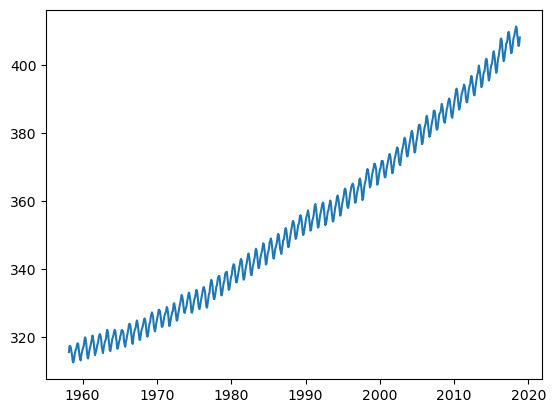

In [11]:
plt.plot(df)

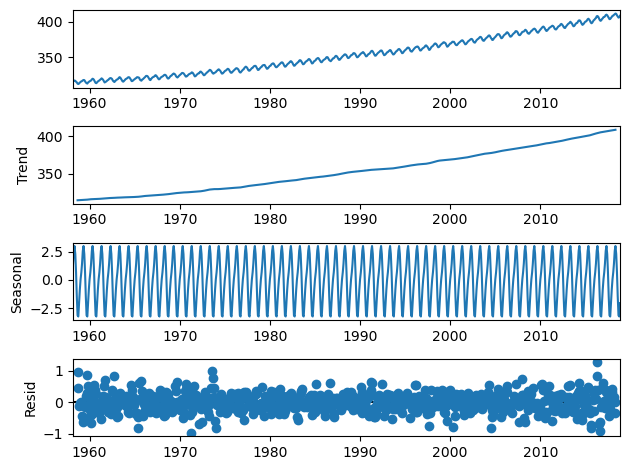

In [12]:
result = seasonal_decompose(df, model='additive')
result.plot()
pyplot.show()

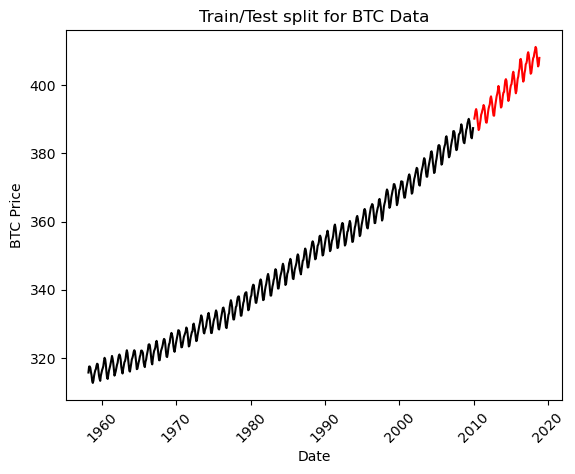

In [13]:
train = df[df.index < pd.to_datetime("2010-01-01", format='%Y-%m-%d')]
test = df[df.index > pd.to_datetime("2010-01-01", format='%Y-%m-%d')]

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.show()

In [14]:
result = adfuller(df, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
# P value 1.0 is not less than .05 - time series is non-stationary

ADF Statistic: 4.99484724440395
p-value: 1.0
Critial Values:
   1%, -3.439620010600208
Critial Values:
   5%, -2.8656309041017756
Critial Values:
   10%, -2.5689484851894413


In [15]:
#df['time_series_s_diff'] = df - df.shift(12)



In [17]:
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(train), len(train)+30)
print(yhat)

2010-01-01    388.184735
2010-02-01    388.621397
2010-03-01    388.870730
2010-04-01    389.013099
2010-05-01    389.094391
2010-06-01    389.140809
2010-07-01    389.167313
2010-08-01    389.182447
2010-09-01    389.191089
2010-10-01    389.196023
2010-11-01    389.198841
2010-12-01    389.200449
2011-01-01    389.201368
2011-02-01    389.201892
2011-03-01    389.202192
2011-04-01    389.202363
2011-05-01    389.202461
2011-06-01    389.202516
2011-07-01    389.202548
2011-08-01    389.202566
2011-09-01    389.202577
2011-10-01    389.202583
2011-11-01    389.202586
2011-12-01    389.202588
2012-01-01    389.202589
2012-02-01    389.202590
2012-03-01    389.202590
2012-04-01    389.202590
2012-05-01    389.202590
2012-06-01    389.202590
2012-07-01    389.202591
Freq: MS, Name: predicted_mean, dtype: float64


In [26]:
model=model
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(df), len(df)+30)
print(yhat)

2018-12-01    409.599668
2019-01-01    410.496505
2019-02-01    411.005673
2019-03-01    411.294746
2019-04-01    411.458864
2019-05-01    411.552040
2019-06-01    411.604939
2019-07-01    411.634972
2019-08-01    411.652023
2019-09-01    411.661704
2019-10-01    411.667200
2019-11-01    411.670320
2019-12-01    411.672091
2020-01-01    411.673097
2020-02-01    411.673668
2020-03-01    411.673992
2020-04-01    411.674176
2020-05-01    411.674281
2020-06-01    411.674340
2020-07-01    411.674374
2020-08-01    411.674393
2020-09-01    411.674404
2020-10-01    411.674410
2020-11-01    411.674413
2020-12-01    411.674415
2021-01-01    411.674417
2021-02-01    411.674417
2021-03-01    411.674418
2021-04-01    411.674418
2021-05-01    411.674418
2021-06-01    411.674418
Freq: MS, Name: predicted_mean, dtype: float64


In [23]:
fcast = model_fit.get_prediction(start=1, end=len(df)+30)
df_p = fcast.predicted_mean
df_ci = fcast.conf_int()

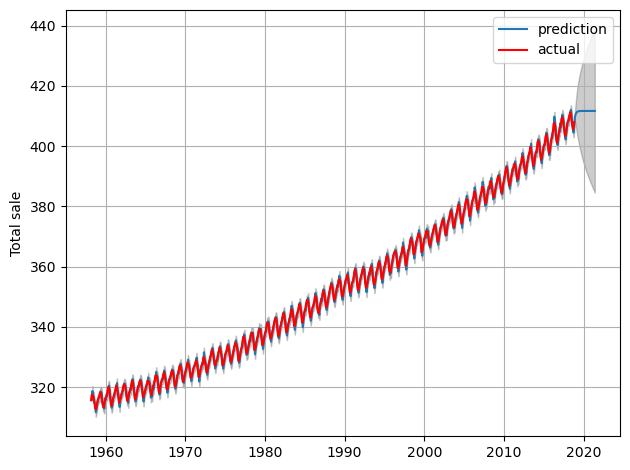

In [22]:
plt.plot(df_p,label='prediction')
plt.plot(df,color='red',label='actual')
plt.fill_between(df_ci.index[1:],
                df_ci.iloc[1:, 0],
                df_ci.iloc[1:, 1], color='k', alpha=.2)
plt.ylabel('Total sale')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

In [24]:
results = model.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5677      0.042     13.524      0.000       0.485       0.650
ma.L1          0.3617      0.047      7.778      0.000       0.271       0.453
sigma2         0.6734      0.041     16.588      0.000       0.594       0.753
